In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train (1).csv to train (1).csv


In [3]:
import os, random, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor


In [4]:
train = pd.read_csv('train (1).csv')
test  = pd.read_csv('test.csv')

print("Train shape:", train.shape)  # expected 65 columns
print("Test  shape:", test.shape)

Train shape: (2000, 65)
Test  shape: (500, 56)


In [5]:

print("\n=== EDA: basic info ===")

print("\nMissing values in train (total):", train.isnull().sum().sum())
print("Missing values in test (total):", test.isnull().sum().sum())

print("\nDescriptive statistics (features):")
display(train.describe().T.head(10))
print("\nDescriptive statistics (targets):")
display(test.describe().T)




=== EDA: basic info ===

Missing values in train (total): 0
Missing values in test (total): 0

Descriptive statistics (features):


,count,mean,std,min,25%,50%,75%,max
Component1_fraction,2000.0,0.180690,0.163200,0.000000,0.030000,0.140000,0.290000,0.500000
Component2_fraction,2000.0,0.182910,0.163704,0.000000,0.040000,0.150000,0.300000,0.500000
Component3_fraction,2000.0,0.179820,0.166283,0.000000,0.020000,0.140000,0.290000,0.500000
Component4_fraction,2000.0,0.342090,0.141119,0.010000,0.220000,0.350000,0.500000,0.500000
Component5_fraction,2000.0,0.114490,0.080219,0.000000,0.050000,0.120000,0.180000,0.290000
Component1_Property1,2000.0,0.000245,0.999423,-2.943737,-0.694658,0.011977,0.685717,2.981146
Component2_Property1,2000.0,-0.017319,1.006409,-1.718895,-0.765154,-0.030235,0.653960,3.051090
Component3_Property1,2000.0,0.001703,0.998859,-3.008683,-0.701948,0.021335,0.673125,2.868901
Component4_Property1,2000.0,-0.004653,1.006902,-3.029468,-0.693361,0.016774,0.659227,2.982258
Component5_Property1,2000.0,-0.018256,1.009294,-3.572440,-0.713149,0.194936,1.032029,1.032029



Descriptive statistics (targets):


,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500000,144.481833,1.000000,125.750000,250.500000,375.250000,500.000000
Component1_fraction,500.0,0.192660,0.168210,0.000000,0.050000,0.150000,0.302500,0.500000
Component2_fraction,500.0,0.169500,0.160552,0.000000,0.020000,0.130000,0.262500,0.500000
Component3_fraction,500.0,0.180600,0.163550,0.000000,0.030000,0.140000,0.290000,0.500000
Component4_fraction,500.0,0.339940,0.140342,0.030000,0.230000,0.350000,0.500000,0.500000
Component5_fraction,500.0,0.117300,0.077806,0.000000,0.050000,0.120000,0.170000,0.280000
Component1_Property1,500.0,-0.000981,1.003309,-2.768830,-0.645530,0.026296,0.653994,2.981146
Component2_Property1,500.0,0.069276,0.971843,-1.718895,-0.664430,0.051025,0.728789,3.051090
Component3_Property1,500.0,-0.006813,1.005525,-3.008683,-0.680915,-0.013937,0.622842,2.986405
Component4_Property1,500.0,0.018611,0.972667,-3.029468,-0.629136,-0.004668,0.637585,2.828759


In [6]:
blend_cols = train.columns[:5].tolist()           # blend composition (5)
component_cols = train.columns[5:55].tolist()     # 50 component properties
target_cols = train.columns[55:].tolist()         # 10 target blend properties

print("\nBlend composition columns:", blend_cols)
print("\nComponent property columns (first 10):", component_cols[:10])
print("\nTarget columns:", target_cols)



Blend composition columns: ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']

Component property columns (first 10): ['Component1_Property1', 'Component2_Property1', 'Component3_Property1', 'Component4_Property1', 'Component5_Property1', 'Component1_Property2', 'Component2_Property2', 'Component3_Property2', 'Component4_Property2', 'Component5_Property2']

Target columns: ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']


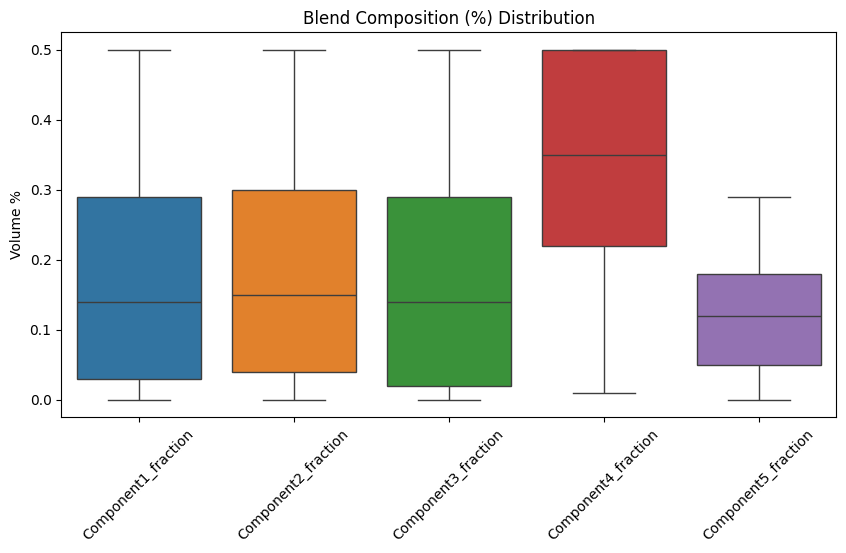

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train[blend_cols])
plt.title("Blend Composition (%) Distribution")
plt.ylabel("Volume %")
plt.xticks(rotation=45)
plt.show()

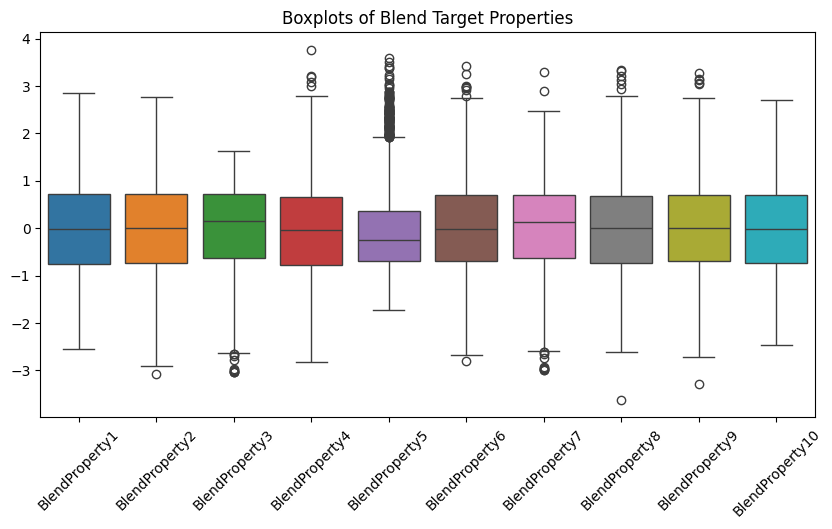

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train[target_cols])
plt.title("Boxplots of Blend Target Properties")
plt.xticks(rotation=45)
plt.show()

In [9]:
zeros_per_target = (train[target_cols] == 0).sum()
print("\nZeros per target:")
display(zeros_per_target)

print("== Missing Values ==")
train.isnull().sum()


Zeros per target:


,0
BlendProperty1,0
BlendProperty2,0
BlendProperty3,0
BlendProperty4,0
BlendProperty5,0
BlendProperty6,0
BlendProperty7,0
BlendProperty8,0
BlendProperty9,0
BlendProperty10,0


== Missing Values ==


,0
Component1_fraction,0
Component2_fraction,0
Component3_fraction,0
Component4_fraction,0
Component5_fraction,0
...,...
BlendProperty6,0
BlendProperty7,0
BlendProperty8,0
BlendProperty9,0


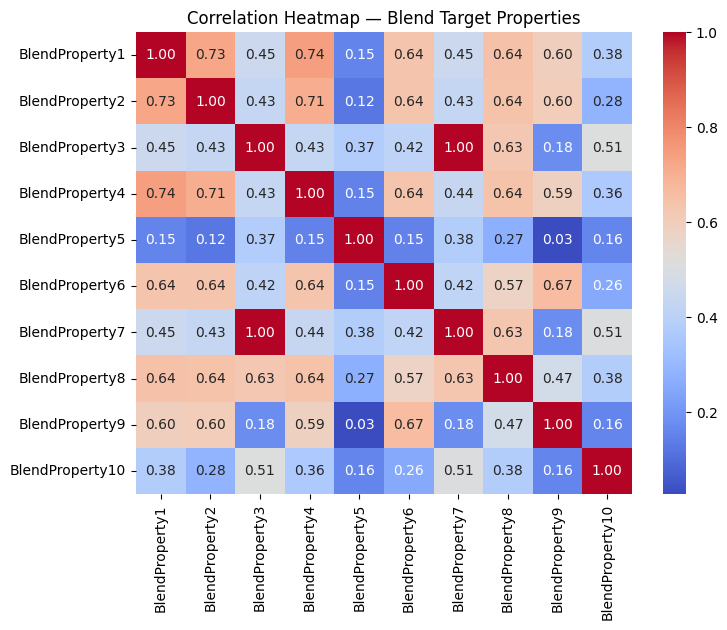

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(train[target_cols].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap — Blend Target Properties")
plt.show()


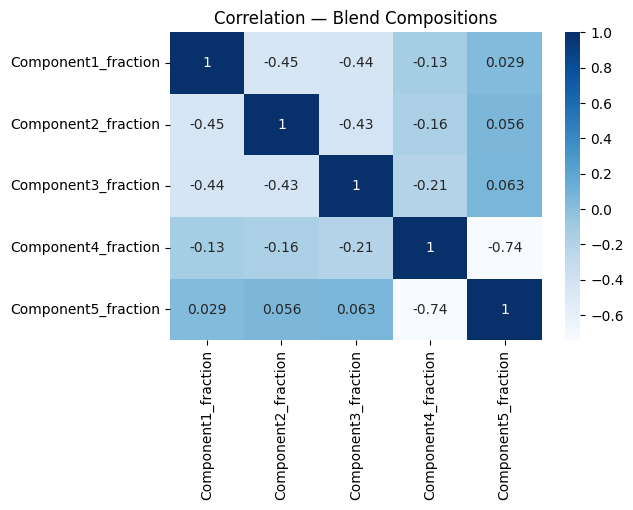

In [11]:
# Correlation among blend compositions
plt.figure(figsize=(6,4))
sns.heatmap(train[blend_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation — Blend Compositions")
plt.show()

<Figure size 800x600 with 0 Axes>

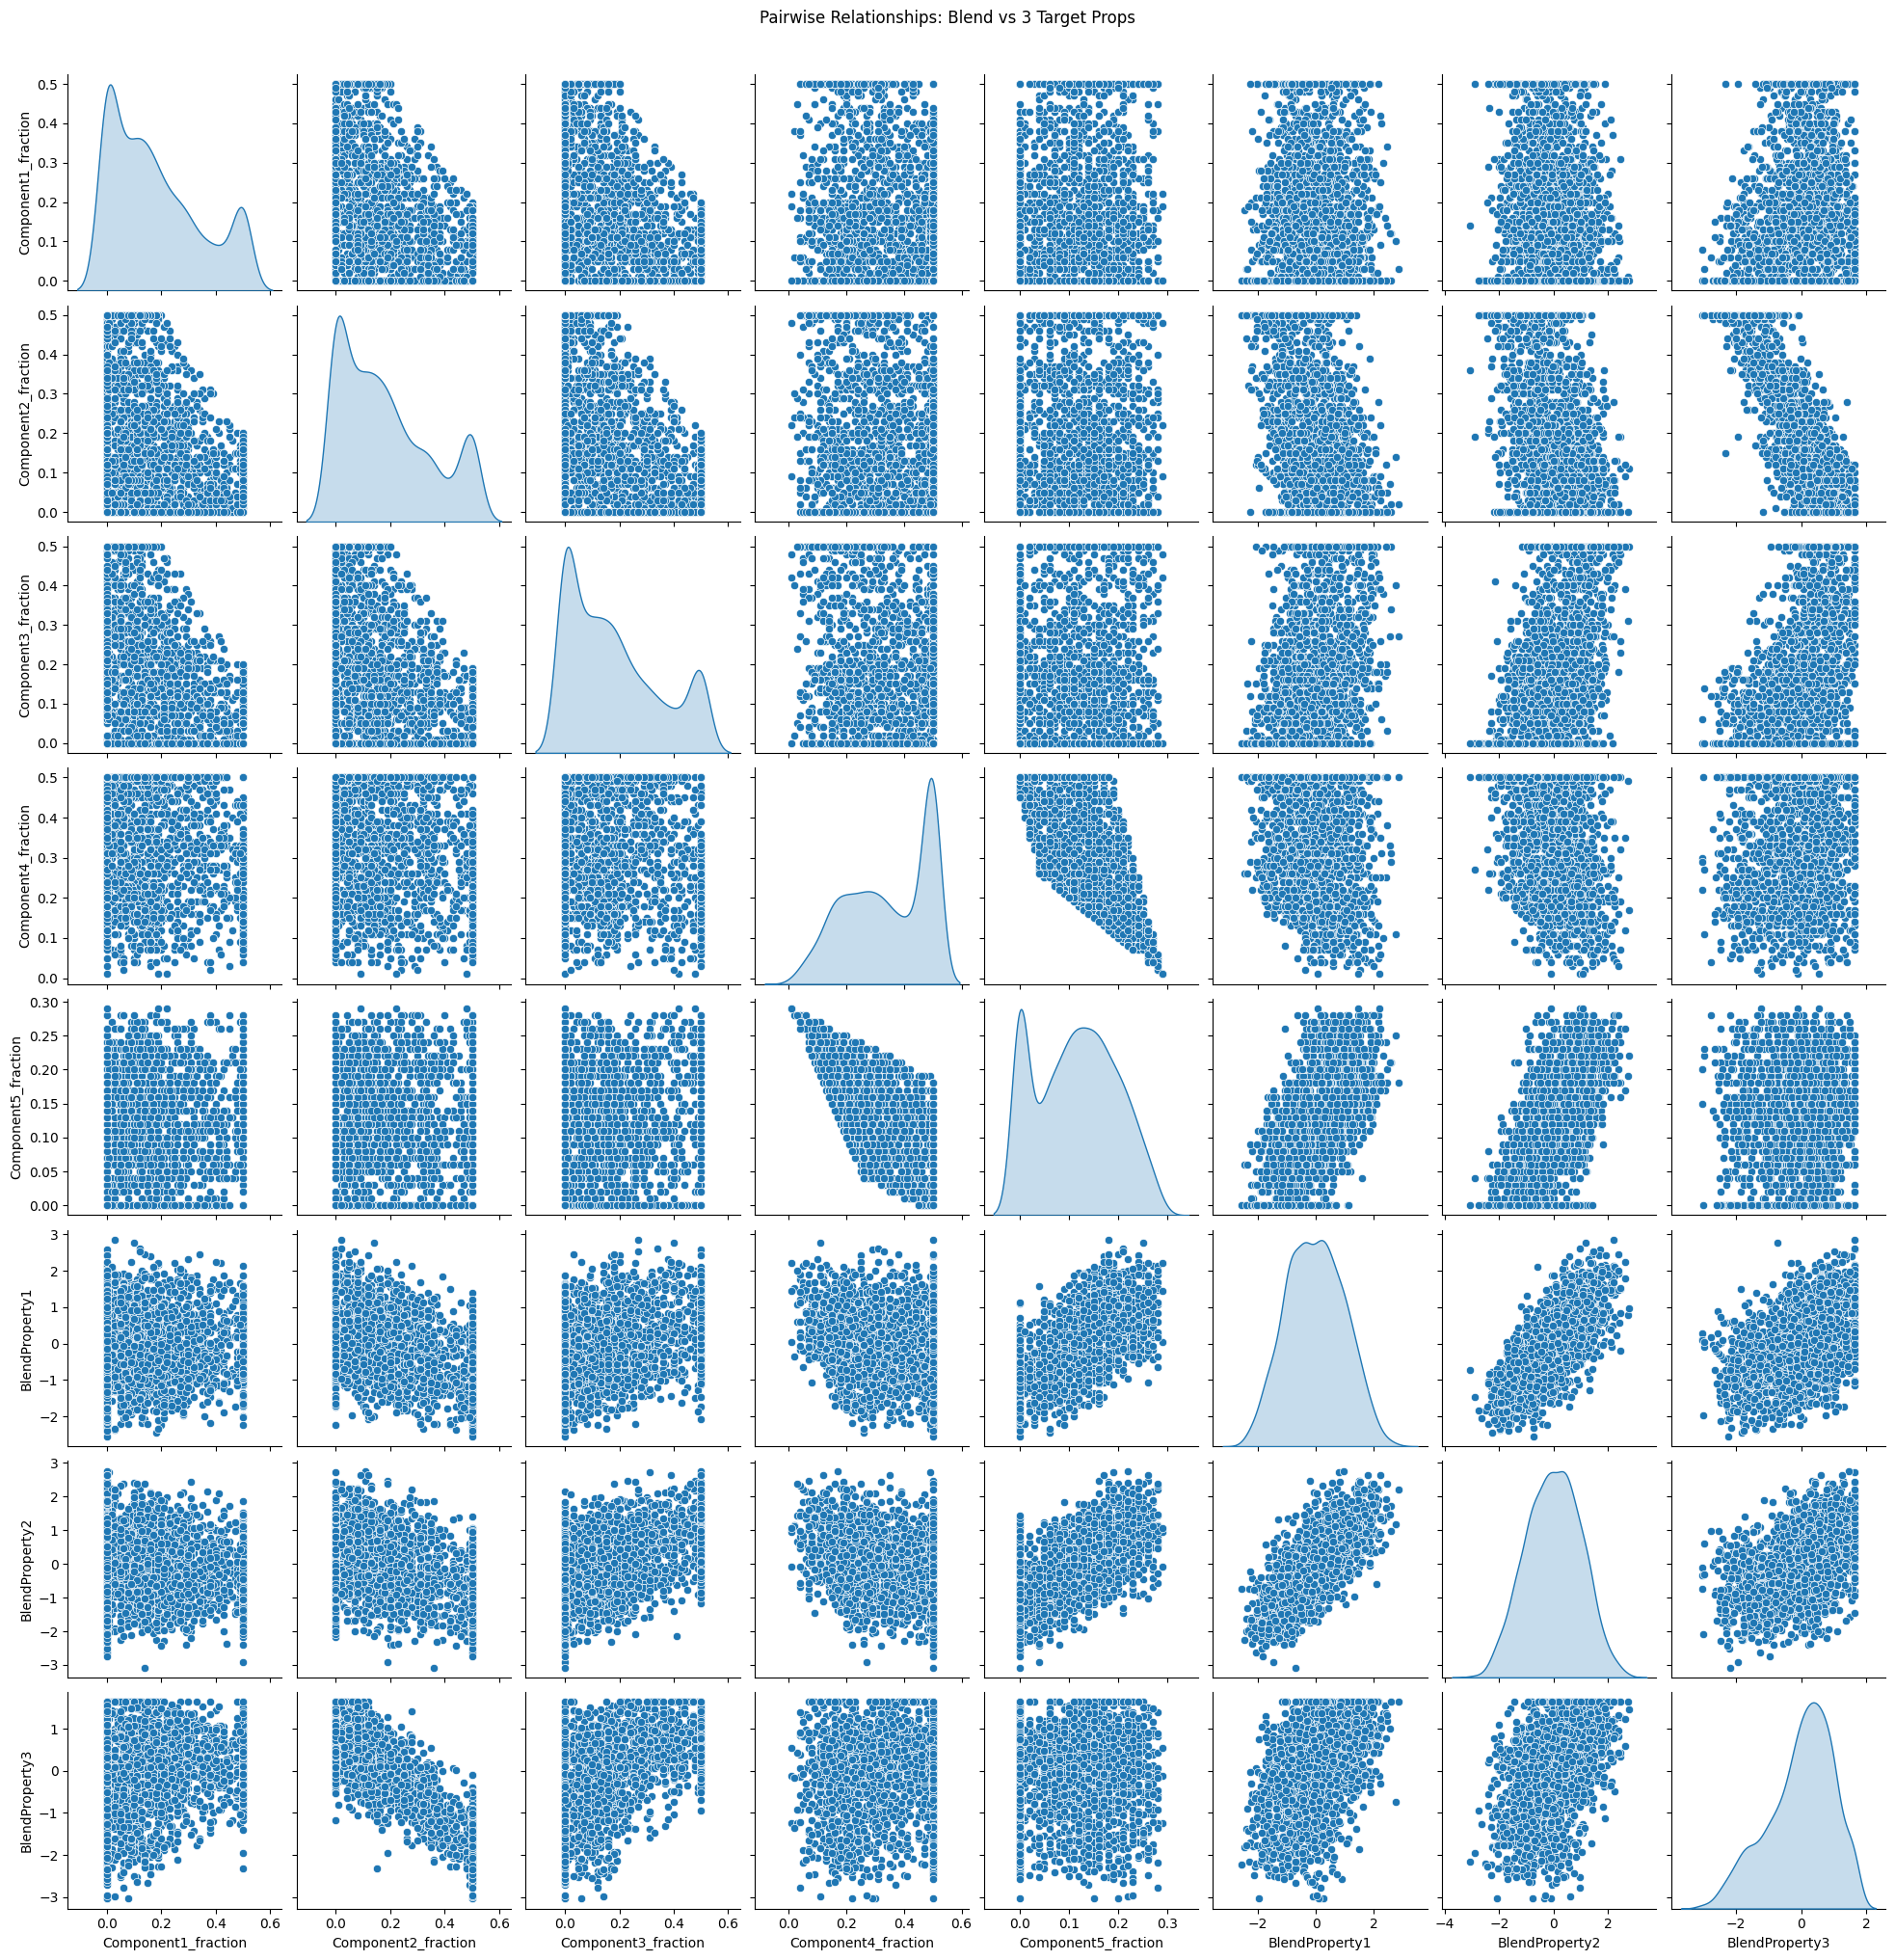

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(train, vars=blend_cols + target_cols[:3], diag_kind="kde")
plt.suptitle("Pairwise Relationships: Blend vs 3 Target Props", y=1.02)
plt.show()

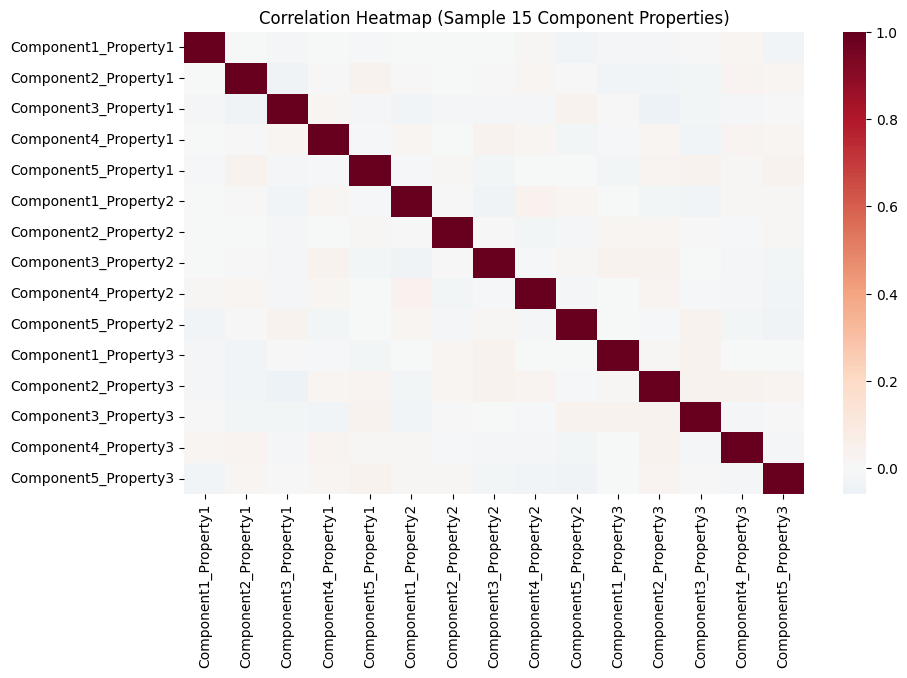

In [13]:
# Check correlation among component properties (sample subset)
corr_sample = train[component_cols[:15]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_sample, cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap (Sample 15 Component Properties)")
plt.show()


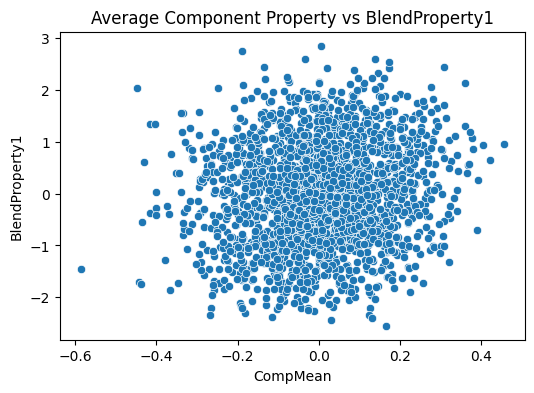

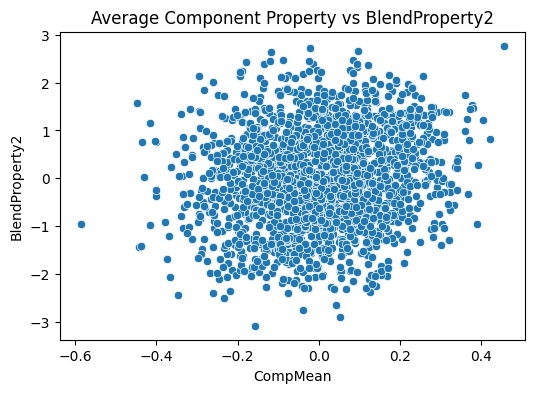

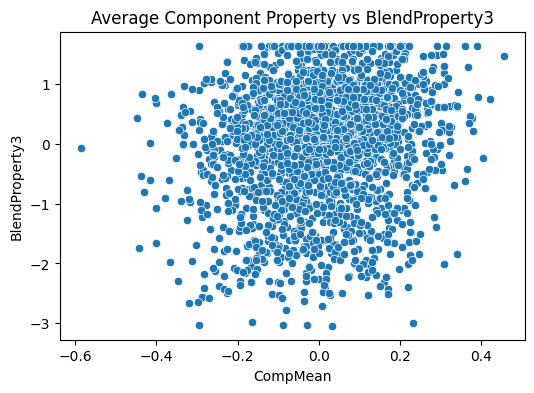

In [14]:
component_means = train[component_cols].mean(axis=1)
train['CompMean'] = component_means

for col in target_cols[:3]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='CompMean', y=col, data=train)
    plt.title(f"Average Component Property vs {col}")
    plt.show()


In [15]:
train["Blend_Sum"] = train[blend_cols].sum(axis=1)
test["Blend_Sum"]  = test[blend_cols].sum(axis=1)

train["Blend_Mean"] = train[blend_cols].mean(axis=1)
test["Blend_Mean"]  = test[blend_cols].mean(axis=1)

train["Blend_Std"] = train[blend_cols].std(axis=1)
test["Blend_Std"]  = test[blend_cols].std(axis=1)

train["Comp_Mean"] = train[component_cols].mean(axis=1)
test["Comp_Mean"]  = test[component_cols].mean(axis=1)

train["Comp_Std"]  = train[component_cols].std(axis=1)
test["Comp_Std"]   = test[component_cols].std(axis=1)

train["Comp_Min"]  = train[component_cols].min(axis=1)
test["Comp_Min"]   = test[component_cols].min(axis=1)

train["Comp_Max"]  = train[component_cols].max(axis=1)
test["Comp_Max"]   = test[component_cols].max(axis=1)

train["Comp_Range"] = train["Comp_Max"] - train["Comp_Min"]
test["Comp_Range"]  = test["Comp_Max"] - test["Comp_Min"]

In [16]:
blend_cols     = train.columns[:5].tolist()
component_cols = train.columns[5:55].tolist()
# Targets by explicit names (safer than positional if order ever changes)
target_cols    = [f"BlendProperty{i}" for i in range(1, 11)]

# --- Split features/targets (no engineering) ---
X_train_blend     = train[blend_cols].copy()
X_train_component = train[component_cols].copy()
y                 = train[target_cols].copy()

X_test_blend      = test[blend_cols].copy()
X_test_component  = test[component_cols].copy()

# --- Scale (StandardScaler) ---

blend_scaler = StandardScaler()
X_train_blend_scaled = pd.DataFrame( blend_scaler.fit_transform(X_train_blend), columns=blend_cols, index=train.index)
X_test_blend_scaled = pd.DataFrame( blend_scaler.transform(X_test_blend),columns=blend_cols, index=test.index)

# Scale component columns (required before PCA)
comp_scaler = StandardScaler()
X_train_comp_scaled = pd.DataFrame( comp_scaler.fit_transform(X_train_component), columns=component_cols, index=train.index)
X_test_comp_scaled = pd.DataFrame( comp_scaler.transform(X_test_component),columns=component_cols, index=test.index)

# --- PCA on component features only ---
pca = PCA(n_components=0.95, svd_solver="full", random_state=42)
train_comp_pcs = pca.fit_transform(X_train_comp_scaled)
test_comp_pcs  = pca.transform(X_test_comp_scaled)

pc_cols = [f"PC_{i+1}" for i in range(train_comp_pcs.shape[1])]
train_pcs_df = pd.DataFrame(train_comp_pcs, columns=pc_cols, index=train.index)
test_pcs_df  = pd.DataFrame(test_comp_pcs,  columns=pc_cols, index=test.index)

# --- Final preprocessed feature tables ---

train_preprocessed = pd.concat([X_train_blend_scaled, train_pcs_df], axis=1)
test_preprocessed  = pd.concat([X_test_blend_scaled,  test_pcs_df],  axis=1)

print("Blend cols (scaled):", blend_cols)
print("PCA components kept:", len(pc_cols))
print("Final train shape:", train_preprocessed.shape)
print("Final test  shape:", test_preprocessed.shape)


Blend cols (scaled): ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']
PCA components kept: 47
Final train shape: (2000, 52)
Final test  shape: (500, 52)


In [17]:
expected_targets = [f"BlendProperty{i}" for i in range(1, 11)]  # exact target order
FOLDS = 2  # fewer folds to speed up
SEED = 42  # reproducibility

# data
X = train_preprocessed.copy().astype("float32")  # features from your scaling+PCA step
X_test = test_preprocessed.copy().astype("float32")  # test features
y = y[expected_targets].copy().astype("float32")  # targets in correct order

# align columns
common = [c for c in X.columns if c in X_test.columns]  # intersection
X, X_test = X[common], X_test[common]  # keep common columns only

# models (small and fast)
models = {
    "Ridge": Ridge(alpha=1.0, random_state=SEED),  # linear baseline
    "LightGBM_fast": MultiOutputRegressor(  # small boosted trees
        LGBMRegressor(
            n_estimators=150,
            learning_rate=0.05,
            num_leaves=31,
            subsample=0.9,
            colsample_bytree=0.8,
            n_jobs=-1,
            random_state=SEED
        ),
        n_jobs=-1
    ),
}

# cross-validation
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)  # KFold setup
rows = []  # store results
for name, model in models.items():  # loop models
    scores = []  # fold scores
    for tr_idx, va_idx in kf.split(X):  # splits
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]  # split X
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]  # split y
        model.fit(X_tr, y_tr)  # fit
        pred = model.predict(X_va)  # predict
        mape = mean_absolute_percentage_error(y_va, pred) * 100.0  # MAPE %
        scores.append(mape)  # collect
    rows.append((name, float(np.mean(scores)), float(np.std(scores))))  # aggregate

# summary
summary = pd.DataFrame(rows, columns=["Model", "CV_MAPE_%_mean", "CV_MAPE_%_std"]).sort_values("CV_MAPE_%_mean")  # sort
print(summary)  # show

# pick best
best_name = summary.iloc[0]["Model"]  # best by mean
best_model = models[best_name]  # select

# fit full and predict
best_model.fit(X, y)  # train on all
test_pred = best_model.predict(X_test)  # predict test

# submission
sub = pd.DataFrame(test_pred, columns=expected_targets)  # exact columns
sub.to_csv("submission.csv", index=False)  # save
print("Saved submission.csv with shape:", sub.shape)  # info
print(sub.head())  # preview
from google.colab import files
files.download("submission.csv")

           Model  CV_MAPE_%_mean  CV_MAPE_%_std
0          Ridge      245.930845      54.012030
1  LightGBM_fast      255.047601      53.702176
Saved submission.csv with shape: (500, 10)
   BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0        0.003082       -0.212236        0.698609        0.488239   
1       -0.447070       -1.258273       -1.225078        0.133751   
2        1.946802        1.592457        1.306953        1.146209   
3       -0.107587        0.072434        0.500513       -0.057896   
4        0.120974       -0.435816        1.096865        0.250457   

   BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
0        1.055637        0.471649        0.687346        0.356105   
1       -1.113277       -0.557724       -1.193700       -1.285919   
2        0.558059        1.250736        1.305010        1.848490   
3        1.090494       -0.382456        0.499239        0.414830   
4        1.456973       -0.118247        1.102014    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>